In [1]:
%load_ext autoreload
%autoreload 2
# run this cell
import syft as sy
from utils import *
from syft import DataSubjectArray
print("Syft is imported")
import numpy as np
from syft.core.adp.data_subject_list import dslarraytonumpyutf8,numpyutf8todslarray

Syft is imported


In [2]:
domain_client = sy.login(
    port=8081,
    email="info@openmined.org",
    password="changethis"
)


Anyone can login as an admin to your node right now because your password is still the default PySyft username and password!!!

Connecting to localhost... done! 	 Logging into canada... done!


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.8M  100 19.8M    0     0  45.5M      0 --:--:-- --:--:-- --:--:-- 45.4M


BreastCancerDataset-02ec48b840824b1ea3e1f5d11c45314b.pkl is successfully downloaded.
Columns: Index(['patient_ids', 'labels', 'images'], dtype='object')
Total Images: 2775
Label Mapping {'Non-Invasive Ductal Carcinoma (IDC)': 0, 'Invasive Ductal Carcinoma (IDC)': 1}


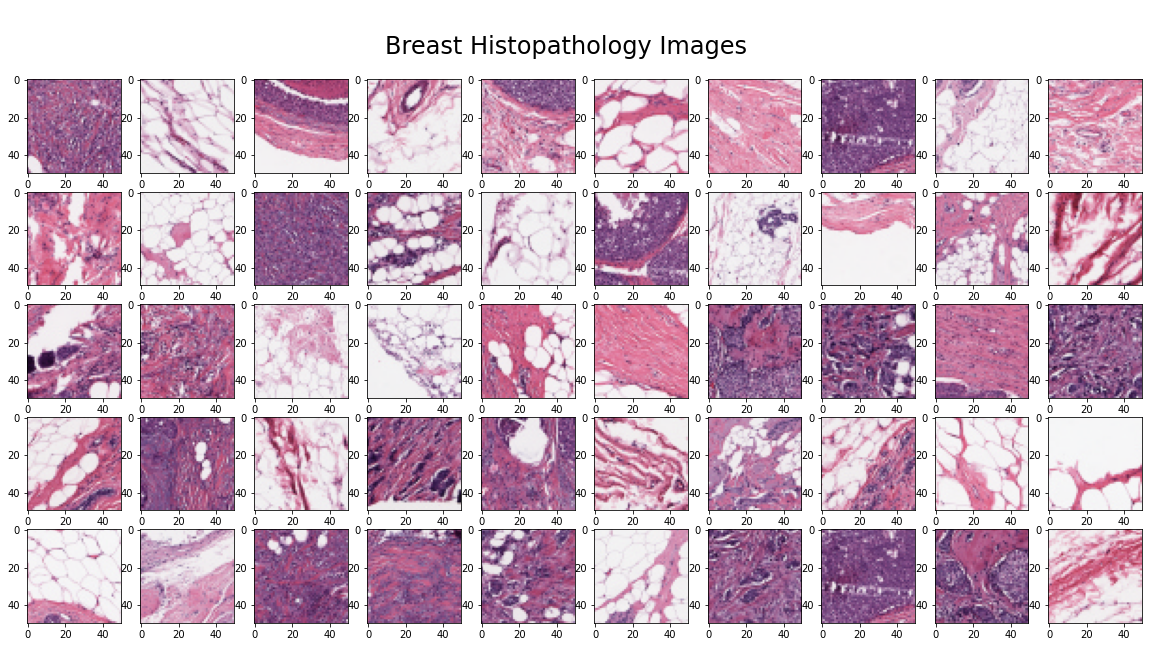

In [3]:
MY_DATASET_URL = "https://raw.githubusercontent.com/OpenMined/datasets/main/BreastCancerDataset/subsets/BreastCancerDataset-02ec48b840824b1ea3e1f5d11c45314b.pkl"
dataset = download_dataset(MY_DATASET_URL)

In [4]:
dataset.head()

,patient_ids,labels,images
0,22545,0,"[[[223, 204, 216], [238, 234, 238], [234, 228,..."
1,22545,0,"[[[205, 100, 129], [197, 86, 122], [188, 80, 1..."
2,22545,0,"[[[227, 205, 215], [204, 143, 176], [218, 169,..."
3,22545,0,"[[[239, 227, 230], [234, 197, 214], [240, 229,..."
4,22545,0,"[[[234, 221, 227], [234, 218, 227], [240, 238,..."


In [5]:
# run this cell
train, val, test = split_and_preprocess_dataset(data=dataset)

Splitting dataset into train, validation and test sets.
Preprocessing the dataset...
Dims (2216, 3, 50, 50)
Dims (259, 3, 50, 50)
Dims (300, 3, 50, 50)
Preprocessing completed.


In [6]:
# run this cell
data_subjects_image = np.ones(train["images"].shape).astype(object)
for i,patient in enumerate(train["patient_ids"]):
    data_subjects_image[i] = DataSubjectArray([str(patient)])

data_subjects_labels = np.ones(train["labels"].shape).astype(object)
for i,patient in enumerate(train["patient_ids"]):
    data_subjects_labels[i] = DataSubjectArray([str(patient)])

    
train_image_data = sy.Tensor(train["images"]).annotated_with_dp_metadata(
    min_val=0, max_val=255, data_subjects=data_subjects_image
)
train_label_data = sy.Tensor(train["labels"]).annotated_with_dp_metadata(
    min_val=0, max_val=1, data_subjects=data_subjects_labels
)

Tensor annotated with DP Metadata
Tensor annotated with DP Metadata


In [ ]:
# data_subjects = DataSubjectList.from_series(val["patient_ids"])
# val_image_data = sy.Tensor(val["images"]).annotated_with_dp_metadata(
#     min_val=0, max_val=255, data_subjects=data_subjects
# )
# val_label_data = sy.Tensor(val["labels"]).annotated_with_dp_metadata(
#     min_val=0, max_val=1, data_subjects=data_subjects
# )

In [ ]:
# data_subjects = DataSubjectList.from_series(test["patient_ids"])
# test_image_data = sy.Tensor(test["images"]).annotated_with_dp_metadata(
#     min_val=0, max_val=255, data_subjects=data_subjects
# )
# test_label_data = sy.Tensor(test["labels"]).annotated_with_dp_metadata(
#     min_val=0, max_val=1, data_subjects=data_subjects
# )

In [8]:
train_image_data = train_image_data[0:5]
train_label_data = train_label_data[0:5]

In [11]:
%%time
from syft.core.adp.data_subject_list import dslarraytonumpyutf8
v= sy.serialize(dslarraytonumpyutf8(train_image_data.child.data_subjects))

CPU times: user 36.6 ms, sys: 4.09 ms, total: 40.6 ms
Wall time: 39.5 ms


In [14]:
train_label_data.child.data_subjects.shape

(5,)

In [15]:
# run this cell
domain_client.load_dataset(
    name="BreastCancerDataset",
    assets={
        "train_images": train_image_data,
        "train_labels": train_label_data,
        # "val_images": val_image_data,
        # "val_labels": val_label_data,
        # "test_images": test_image_data,
        # "test_labels": test_label_data,
    },
    description="Invasive Ductal Carcinoma (IDC) is the most common subtype of all breast cancers. \
    The modified dataset consisted of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x. \
    Patches of size 50 x 50 were extracted from the original image. The labels 0 is non-IDC and 1 is IDC."
)

Loading dataset... uploading...🚀                                                                                                                                             

Uploading `train_labels`: 100%|██████████████████████████████████████| 1/1 [00:00<00:00, 166.16it/s]


Dataset is uploaded successfully !!! 🎉

Run `<your client variable>.datasets` to see your new dataset loaded into your machine!


In [ ]:
# run this cell
t = domain_client.datasets[-1]["train_images"]

In [ ]:
t.data_subjects.shape

In [ ]:
t  = domain_client.datasets[-1]["train_labels"]

In [ ]:
t.shape

<br /><br />